In [1]:
%reset

# 1. Imports

In [95]:
import mne
import time
import os
import numpy as np
import custom_modules.xdf_to_fif_converter as xtfc
import custom_modules.preprocessing_ptu as prep
import custom_modules.file_handling as  fh

import importlib
importlib.reload(xtfc)
importlib.reload(prep)
importlib.reload(fh)

<module 'custom_modules.file_handling' from 'C:\\Users\\peter\\Documents\\Code\\master-thesis\\03_analysis\\custom_modules\\file_handling.py'>

In [2]:
mne.__version__

'1.0.3'

# 2. Constants

In [117]:
data_path = 'D:/Diplomarbeit_data/eeg/'
# subjects = ['A01', 'A02', 'A03', 'A04', 'A05', 'A06', 'A07' , 'A08', 'A10']
subjects = ['A01', 'A02', 'A03', 'A04', 'A05', 'A06', 'A07' , 'A08', 'A09', 'A10']
trial_type_markers = ['LTR-s', 'LTR-l','RTL-s', 'RTL-l', 'TTB-s', 'TTB-l', 'BTT-s', 'BTT-l']

mne.set_log_level('WARNING') #'INFO' 'WARNING'

# 3. XDF --> FIF
The following cell reads all xdf-files containing the raw eeg and loads them into the mne structure and stores them as .fif-files.

In [5]:
help(xtfc.xdf_to_fif)

Help on function xdf_to_fif in module custom_modules.xdf_to_fif_converter:

xdf_to_fif(src, dst, sbj)
    Convert .xdf files to .fif files for a given subject.
    
    :param src: str, path of the folder containing .xdf files.
    :param dst: str, path of the folder where to save the .fif files.
    :param sbj: str, subject identifier.



In [6]:
# Get source and destination path + create destintation folder if it does not exist.
src_path, dst_path = fh.gen_paths(pth=data_path, src_fldr='raw', dst_fldr='raw_fif')

# Iterate over each subject and extract the streams
start = time.time()
for i, subject in enumerate(subjects):
    print(f'Extracting subject {subject}', end=' ')

    # Call the xdf_to_fif function from the xtfc module which takes care of converting the xdf files to fif files:
    xtfc.xdf_to_fif(src_path, dst_path, subject)

    print()

print(f'Finished reading, took me {round(time.time()-start)} seconds...')

Extracting subject A01 # # # # # # # # # 

KeyboardInterrupt: 

# 4. Concatenate all fif files for each subject

In [ ]:
help(prep.concat_fifs)

In [17]:
# Get source and destination path + create destintation folder if it does not exist.
src_path, dst_path = fh.gen_paths(pth=data_path, src_fldr='raw_fif', dst_fldr='2023_03_22_concat')

# Iterate over each subject and extract the streams
start = time.time()
for i, subject in enumerate(subjects):
    print(f'Reading all fif files for subject {subject}', end=' ')

    # Concatenate all raw files for the paradigm and the eye paradigm:
    prep.concat_fifs(src=src_path, dst=dst_path, sbj=subject, paradigm='paradigm')
    prep.concat_fifs(src=src_path, dst=dst_path, sbj=subject, paradigm='eye')
    print()

print(f'Finished concatenating, took me {round(time.time() - start)} seconds...')

Reading all fif files for subject A01 # # # # # # # # # # # 
Reading all fif files for subject A02 # # # # # # # # # # # 
Reading all fif files for subject A03 # # # # # # # # # # # 
Reading all fif files for subject A04 # # # # # # # # # # # 
Reading all fif files for subject A05 # # # # # # # # # # # 
Reading all fif files for subject A06 # # # # # # # # # # # 
Reading all fif files for subject A07 # # # # # # # # # # # 
Reading all fif files for subject A08 # # # # # # # # # # # 
Reading all fif files for subject A09 # # # # # # # # # # # 
Reading all fif files for subject A10 # # # # # # # # # # # 
Finished concatenating, took me 47 seconds...


# 5. Filter  the data (HP 0.4 Hz and Notch 50 Hz)

In [18]:
help(prep.filter_fifs)

Help on function filter_fifs in module custom_modules.preprocessing_ptu:

filter_fifs(src, dst, sbj, paradigm='paradigm')
    Applies highpass and notch filters to a single raw EEG data file, and saves the filtered data in a new file.
    
    :param src: The directory path containing the original raw EEG data file.
    :type src: str
    
    :param dst: The directory path where the filtered EEG data file will be stored.
    :type dst: str
    
    :param sbj: The subject identifier for the raw EEG data file.
    :type sbj: str
    
    :param paradigm: The task identifier for the raw EEG data file. Default is 'paradigm'.
    :type paradigm: str
    
    :return: None
    :rtype: None



In [19]:
# Get source and destination path + create destintation folder if it does not exist.
src_path, dst_path = fh.gen_paths(pth=data_path, src_fldr='2023_03_22_concat', dst_fldr='2023_03_22_filtered')

# Iterate over each subject and extract the streams
start = time.time()
for i, subject in enumerate(subjects):
    print(f'Filtering raw EEG for subject {subject}')

    # Concatenate all raw files for the paradigm and the eye paradigm:
    prep.filter_fifs(src=src_path, dst=dst_path, sbj=subject, paradigm='paradigm')
    prep.filter_fifs(src=src_path, dst=dst_path, sbj=subject, paradigm='eye')

print(f'Finished filtering, took me {round(time.time() - start)} seconds...')

Filtering raw EEG for subject A01
Filtering raw EEG for subject A02
Filtering raw EEG for subject A03
Filtering raw EEG for subject A04
Filtering raw EEG for subject A05
Filtering raw EEG for subject A06
Filtering raw EEG for subject A07
Filtering raw EEG for subject A08
Filtering raw EEG for subject A09
Filtering raw EEG for subject A10
Finished filtering, took me 76 seconds...


# 6. Interpolate bad channels

In this cell the bad channels are interpolated based on visual inspection. The visual inspection was performed prior and the channels are stored in ***/dataframes/preprocessing/bad_channels.csv***

In [20]:
help(prep.interpolate_bads)

Help on function interpolate_bads in module custom_modules.preprocessing_ptu:

interpolate_bads(src, dst, sbj, paradigm='paradigm')
    Interpolates bad channels in the raw data file for a given subject and saves the interpolated raw file.
    
    :param src: The path to the directory containing the raw data files.
    :type src: str
    :param dst: The path to the directory where the interpolated raw file will be saved.
    :type dst: str
    :param sbj: The subject identifier for the data file to be interpolated.
    :type sbj: str
    :param paradigm: The paradigm identifier for the data file to be interpolated. Default is 'paradigm'.
    :type paradigm: str
    :return: None



In [96]:
# Get source and destination path + create destintation folder if it does not exist.
src_path, dst_path = fh.gen_paths(pth=data_path, src_fldr='2023_03_22_filtered', dst_fldr='2023_03_22_bad_ch_interpolated')

# Iterate over each subject and extract the streams
start = time.time()
for i, subject in enumerate(subjects):
    print(f'Interpolating bad channels for subject {subject}')

    # Interpolate bad channels for all raw files for the paradigm and the eye paradigm:
    prep.interpolate_bads(src=src_path, dst=dst_path, sbj=subject, paradigm='paradigm')
    prep.interpolate_bads(src=src_path, dst=dst_path, sbj=subject, paradigm='eye')

print(f'Finished interpolating, took me {round(time.time() - start)} seconds...')

Interpolating bad channels for subject A05
['O1', 'P6', 'Oz', 'AF7', 'Fp1', 'Fp2', 'PO7', 'T8', 'O2', 'AF3', 'AF4', 'AF8']
['O1', 'P6', 'Oz', 'AF7', 'Fp1', 'Fp2', 'PO7', 'T8', 'O2', 'AF3', 'AF4', 'AF8']
Finished interpolating, took me 4 seconds...


# 7. Eyesub

In [97]:
# Apply the eyesub matrices:
# Get source and destination path + create destintation folder if it does not exist.
src_path, dst_path = fh.gen_paths(pth=data_path, src_fldr='2023_03_22_bad_ch_interpolated', dst_fldr='2023_03_22_eyesubed')

# Iterate over each subject and extract the streams
start = time.time()
for i, subject in enumerate(subjects):
    print(f'Fitting eye subtraction for subject {subject}')

    # Interpolate bad channels for all raw files for the paradigm and the eye paradigm:
    prep.fit_sgeyesub(src=src_path, dst=dst_path, sbj=subject, paradigm='paradigm')

print(f'Finished sgeyesub fitting, took me {round(time.time() - start)} seconds...')


Fitting eye subtraction for subject A05
Finished sgeyesub fitting, took me 4 seconds...


In [17]:
# Get source and destination path + create destintation folder if it does not exist.
src_path, dst_path = fh.gen_paths(pth=data_path, src_fldr='2023_03_24_car_filtered_test', dst_fldr='2023_03_22_car_filtered')

# load raw for subj a09:
f_name = [f for f in os.listdir(src_path) if ('A02' in f) and ('paradigm' in f)][0]
file = src_path + '/' + f_name
raw_eyesubed = mne.io.read_raw(file, preload=True)

src_path, dst_path = fh.gen_paths(pth=data_path, src_fldr='2023_03_22_car_filtered', dst_fldr='2023_03_22_car_filtered')

# load raw for subj a09:
f_name = [f for f in os.listdir(src_path) if ('A02' in f) and ('paradigm' in f)][0]
file = src_path + '/' + f_name
raw = mne.io.read_raw(file, preload=True)

In [18]:
raw.plot(title='Orig')
raw_eyesubed.plot(title='Modified Eyesub')

# 7. CAR

In [104]:
# Get source and destination path + create destintation folder if it does not exist.
src_path, dst_path = fh.gen_paths(pth=data_path, src_fldr='2023_03_22_eyesubed', dst_fldr='2023_03_22_car_filtered')

# Iterate over each subject and extract the streams
start = time.time()
for i, subject in enumerate(subjects):
    print(f'Re-referencing for subject {subject}')

    # Concatenate all raw files for the paradigm:
    prep.car(src=src_path, dst=dst_path, sbj=subject, paradigm='paradigm')

print(f'Finished interpolating, took me {round(time.time() - start)} seconds...')

Re-referencing for subject A05
Finished interpolating, took me 4 seconds...


# 8. Mark bad dataspans
Mark bad dataspans due to user errors in paradigm.

In [105]:
# Get source and destination path + create destintation folder if it does not exist.
src_path, dst_path = fh.gen_paths(pth=data_path, src_fldr='2023_03_22_car_filtered', dst_fldr='2023_03_22_bad_dataspans_marked')

# Iterate over each subject and extract the streams
start = time.time()
for i, subject in enumerate(subjects):
    print(f'Marking bad dataspans for outlier detection for subject {subject}')

    # Concatenate all raw files for the paradigm:
    prep.mark_bad_dataspans(src=src_path, dst=dst_path, sbj=subject, paradigm='paradigm')

print(f'Finished interpolating, took me {round(time.time() - start)} seconds...')

Marking bad dataspans for outlier detection for subject A05
64
Finished interpolating, took me 3 seconds...


# 9. Epoching for outlier detection

In [30]:
# Get source and destination path + create destintation folder if it does not exist.
src_path, dst_path = fh.gen_paths(pth=data_path, src_fldr='2023_03_22_bad_dataspans_marked', dst_fldr='2023_03_22_epoched_for_outlier_detection')

# Iterate over each subject and extract the streams
start = time.time()
for i, subject in enumerate(subjects):
    print(f'Epoching for outlier detection for subject {subject}')

    # Concatenate all raw files for the paradigm:
    prep.epoch_for_outlier_detection(src=src_path, dst=dst_path, sbj=subject, paradigm='paradigm')

print(f'Finished interpolating, took me {round(time.time() - start)} seconds...')

Epoching for outlier detection for subject A01
Opening raw data file D:/Diplomarbeit_data/eeg/2023_03_22_bad_dataspans_marked/A01_paradigm_bad_dataspans_marked_raw.fif...
    Range : 1131211 ... 1928726 =   5656.055 ...  9643.630 secs
Ready.
Reading 0 ... 797515  =      0.000 ...  3987.575 secs...
Used Annotations descriptions: ['BTT-l', 'BTT-l_ct0', 'BTT-l_ct1', 'BTT-l_ib0', 'BTT-l_ib1', 'BTT-s', 'BTT-s_cc0', 'BTT-s_cc1', 'BTT-s_ib0', 'BTT-s_ib1', 'Break', 'Cue', 'LTR-l', 'LTR-l_cr0', 'LTR-l_cr1', 'LTR-l_il0', 'LTR-l_il1', 'LTR-s', 'LTR-s_cc0', 'LTR-s_cc1', 'LTR-s_il0', 'LTR-s_il1', 'RTL-l', 'RTL-l_cl0', 'RTL-l_cl1', 'RTL-l_ir0', 'RTL-l_ir1', 'RTL-s', 'RTL-s_cc0', 'RTL-s_cc1', 'RTL-s_ir0', 'RTL-s_ir1', 'Start', 'TTB-l', 'TTB-l_cb0', 'TTB-l_cb1', 'TTB-l_it0', 'TTB-l_it1', 'TTB-s', 'TTB-s_cc0', 'TTB-s_cc1', 'TTB-s_it0', 'TTB-s_it1', 'c c 0', 'c c 1', 'c l 0', 'c l 1', 'c r 0', 'c r 1', 'c t 0', 'c t 1']
Not setting metadata
360 matching events found
No baseline correction applied
0 proj

## 9.1. Visualize epochs

In [8]:
# Get source and destination path + create destintation folder if it does not exist.
src_path, dst_path = fh.gen_paths(pth=data_path, src_fldr='2023_03_22_epoched_for_outlier_detection', dst_fldr='2023_03_22_epoched_for_outlier_detection')

sbj_to_vis = 'A01'

# Visualize epochs for subject:
epochs = prep.vis_epochs_for_sbj(src=src_path, sbj=sbj_to_vis)
fig = epochs.plot()

## 9.2. Visualize raw

In [107]:
# Get source and destination path + create destintation folder if it does not exist.
src_path, dst_path = fh.gen_paths(pth=data_path, src_fldr='2023_03_22_bad_dataspans_marked', dst_fldr='2023_03_22_manual_rejection_added')

sbj_to_vis = 'A05'

# Visualize raw for subject:
raw = prep.vis_raw_for_sbj(src=src_path, sbj=sbj_to_vis)
raw.plot()


In [108]:
# Store raw with bad epochs marked:
# Store the epoched file:
store_name = dst_path + '/' + sbj_to_vis + '_' + 'paradigm' + '_bad_epochs_added_raw.fif'
raw.save(store_name, overwrite=True)

# 10. Lowpass filtering

In [118]:
# Get source and destination path + create destintation folder if it does not exist.
src_path, dst_path = fh.gen_paths(pth=data_path, src_fldr='2023_03_22_manual_rejection_added', dst_fldr='2023_03_22_lowpass_filtered')

# Iterate over each subject and extract the streams
start = time.time()
for i, subject in enumerate(subjects):
    print(f'Lowpass filter for subject {subject}')

    # Lowpass filter all raw files for the paradigm:
    prep.lowpass_filter(src=src_path, dst=dst_path, sbj=subject, paradigm='paradigm')

print(f'Finished lowpass filtering, took me {round(time.time() - start)} seconds...')

Lowpass filter for subject A01
Lowpass filter for subject A02
Lowpass filter for subject A03
Lowpass filter for subject A04
Lowpass filter for subject A05
Lowpass filter for subject A06
Lowpass filter for subject A07
Lowpass filter for subject A08
Lowpass filter for subject A09
Lowpass filter for subject A10
Finished lowpass filtering, took me 56 seconds...


# 11. Epoch and resample:

## 11.1. Cue-aligned

In [119]:
# Get source and destination path + create destintation folder if it does not exist.
src_path, dst_path = fh.gen_paths(pth=data_path, src_fldr='2023_03_22_lowpass_filtered', dst_fldr='2023_03_22_epoched_cue_aligned')

# Iterate over each subject and extract the streams
start = time.time()
for i, subject in enumerate(subjects):
    print(f'Epoching cue-aligned for subject {subject}')

    # Epoch all raw files for the paradigm:
    prep.epoch_and_resample(src=src_path, dst=dst_path, sbj=subject, paradigm='paradigm', cue_aligned=True)

print(f'Finished epoching, took me {round(time.time() - start)} seconds...')

Epoching cue-aligned for subject A01
Opening raw data file D:/Diplomarbeit_data/eeg/2023_03_22_lowpass_filtered/A01_paradigm_lowpass_filtered_raw.fif...
    Range : 1131211 ... 1928726 =   5656.055 ...  9643.630 secs
Ready.
Reading 0 ... 797515  =      0.000 ...  3987.575 secs...
Used Annotations descriptions: ['BTT-l', 'BTT-l_ct0', 'BTT-l_ct1', 'BTT-l_ib0', 'BTT-l_ib1', 'BTT-s', 'BTT-s_cc0', 'BTT-s_cc1', 'BTT-s_ib0', 'BTT-s_ib1', 'Break', 'Cue', 'LTR-l', 'LTR-l_cr0', 'LTR-l_cr1', 'LTR-l_il0', 'LTR-l_il1', 'LTR-s', 'LTR-s_cc0', 'LTR-s_cc1', 'LTR-s_il0', 'LTR-s_il1', 'RTL-l', 'RTL-l_cl0', 'RTL-l_cl1', 'RTL-l_ir0', 'RTL-l_ir1', 'RTL-s', 'RTL-s_cc0', 'RTL-s_cc1', 'RTL-s_ir0', 'RTL-s_ir1', 'Start', 'TTB-l', 'TTB-l_cb0', 'TTB-l_cb1', 'TTB-l_it0', 'TTB-l_it1', 'TTB-s', 'TTB-s_cc0', 'TTB-s_cc1', 'TTB-s_it0', 'TTB-s_it1', 'c c 0', 'c c 1', 'c l 0', 'c l 1', 'c r 0', 'c r 1', 'c t 0', 'c t 1']
Not setting metadata
360 matching events found
No baseline correction applied
0 projection items activ

## 11.2. Movement-onset aligned

In [120]:
# Get source and destination path + create destintation folder if it does not exist.
src_path, dst_path = fh.gen_paths(pth=data_path, src_fldr='2023_03_22_lowpass_filtered', dst_fldr='2023_03_22_epoched_movement_aligned')

# Iterate over each subject and extract the streams
start = time.time()
for i, subject in enumerate(subjects):
    print(f'Epoching movement-aligned for subject {subject}')

    # Epoch all raw files for the paradigm:
    prep.epoch_and_resample(src=src_path, dst=dst_path, sbj=subject, paradigm='paradigm', cue_aligned=False)

print(f'Finished epoching, took me {round(time.time() - start)} seconds...')

Epoching movement-aligned for subject A01
Opening raw data file D:/Diplomarbeit_data/eeg/2023_03_22_lowpass_filtered/A01_paradigm_lowpass_filtered_raw.fif...
    Range : 1131211 ... 1928726 =   5656.055 ...  9643.630 secs
Ready.
Reading 0 ... 797515  =      0.000 ...  3987.575 secs...
Used Annotations descriptions: ['BTT-l', 'BTT-l_ct0', 'BTT-l_ct1', 'BTT-l_ib0', 'BTT-l_ib1', 'BTT-s', 'BTT-s_cc0', 'BTT-s_cc1', 'BTT-s_ib0', 'BTT-s_ib1', 'Break', 'Cue', 'LTR-l', 'LTR-l_cr0', 'LTR-l_cr1', 'LTR-l_il0', 'LTR-l_il1', 'LTR-s', 'LTR-s_cc0', 'LTR-s_cc1', 'LTR-s_il0', 'LTR-s_il1', 'RTL-l', 'RTL-l_cl0', 'RTL-l_cl1', 'RTL-l_ir0', 'RTL-l_ir1', 'RTL-s', 'RTL-s_cc0', 'RTL-s_cc1', 'RTL-s_ir0', 'RTL-s_ir1', 'Start', 'TTB-l', 'TTB-l_cb0', 'TTB-l_cb1', 'TTB-l_it0', 'TTB-l_it1', 'TTB-s', 'TTB-s_cc0', 'TTB-s_cc1', 'TTB-s_it0', 'TTB-s_it1', 'c c 0', 'c c 1', 'c l 0', 'c l 1', 'c r 0', 'c r 1', 'c t 0', 'c t 1']
Not setting metadata
352 matching events found
No baseline correction applied
0 projection items 

# 12. Epoch for plotting (without downsampling):

## 12.1. Cue-aligned

In [121]:
# Get source and destination path + create destintation folder if it does not exist.
src_path, dst_path = fh.gen_paths(pth=data_path, src_fldr='2023_03_22_lowpass_filtered', dst_fldr='2023_03_22_epoched_cue_aligned_not_resampled')

# Iterate over each subject and extract the streams
start = time.time()
for i, subject in enumerate(subjects):
    print(f'Epoching cue-aligned for subject {subject}')

    # Epoch all raw files for the paradigm:
    prep.epoch_and_resample(src=src_path, dst=dst_path, sbj=subject, paradigm='paradigm', cue_aligned=True, resample=False)

print(f'Finished epoching, took me {round(time.time() - start)} seconds...')

Epoching cue-aligned for subject A01
Opening raw data file D:/Diplomarbeit_data/eeg/2023_03_22_lowpass_filtered/A01_paradigm_lowpass_filtered_raw.fif...
    Range : 1131211 ... 1928726 =   5656.055 ...  9643.630 secs
Ready.
Reading 0 ... 797515  =      0.000 ...  3987.575 secs...
Used Annotations descriptions: ['BTT-l', 'BTT-l_ct0', 'BTT-l_ct1', 'BTT-l_ib0', 'BTT-l_ib1', 'BTT-s', 'BTT-s_cc0', 'BTT-s_cc1', 'BTT-s_ib0', 'BTT-s_ib1', 'Break', 'Cue', 'LTR-l', 'LTR-l_cr0', 'LTR-l_cr1', 'LTR-l_il0', 'LTR-l_il1', 'LTR-s', 'LTR-s_cc0', 'LTR-s_cc1', 'LTR-s_il0', 'LTR-s_il1', 'RTL-l', 'RTL-l_cl0', 'RTL-l_cl1', 'RTL-l_ir0', 'RTL-l_ir1', 'RTL-s', 'RTL-s_cc0', 'RTL-s_cc1', 'RTL-s_ir0', 'RTL-s_ir1', 'Start', 'TTB-l', 'TTB-l_cb0', 'TTB-l_cb1', 'TTB-l_it0', 'TTB-l_it1', 'TTB-s', 'TTB-s_cc0', 'TTB-s_cc1', 'TTB-s_it0', 'TTB-s_it1', 'c c 0', 'c c 1', 'c l 0', 'c l 1', 'c r 0', 'c r 1', 'c t 0', 'c t 1']
Not setting metadata
360 matching events found
No baseline correction applied
0 projection items activ

In [122]:
# Keep this line while editing in preprocessing:
importlib.reload(prep)

# Plot cue-aligned grand average:
src_path, dst_path = fh.gen_paths(pth=data_path, src_fldr='2023_03_22_epoched_cue_aligned_not_resampled', dst_fldr='2023_03_22_results_epoched_cue_aligned_figs_eyesub')

prep.plot_grand_average(src=src_path, dst=dst_path, sbj_list=subjects, paradigm='paradigm', split=[''])

prep.plot_grand_average(src=src_path, dst=dst_path, sbj_list=subjects, paradigm='paradigm', split=['long', 'short'])

prep.plot_grand_average(src=src_path, dst=dst_path, sbj_list=subjects, paradigm='paradigm', split=['up', 'down', 'left', 'right'])

times_of_interest = [0.9, 1.5, 2.0, 2.1, 2.2, 2.3]

# prep.plot_topomaps(src=src_path, dst=dst_path, sbj_list=subjects, paradigm='paradigm', split=[''], times=times_of_interest)
#
# prep.plot_topomaps(src=src_path, dst=dst_path, sbj_list=subjects, paradigm='paradigm', split=['long', 'short'], times=times_of_interest)
#
# prep.plot_topomaps(src=src_path, dst=dst_path, sbj_list=subjects, paradigm='paradigm', split=['up', 'down', 'left', 'right'], times=times_of_interest)


C:\Users\peter\Documents\Code\master-thesis\03_analysis\custom_modules\preprocessing_ptu.py:983: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  ncols=ncols, nrows='auto',
C:\Users\peter\Documents\Code\master-thesis\03_analysis\custom_modules\preprocessing_ptu.py:983: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  ncols=ncols, nrows='auto',
C:\Users\peter\Documents\Code\master-thesis\03_analysis\custom_modules\preprocessing_ptu.py:983: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  ncols=ncols, nrows='auto',
C:\Users\peter\Documents\Code\master-thesis\03_analysis\custom_modules\preprocessing_ptu.py:983: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  ncols=ncols, nrows='auto',
C:\Users\peter\Documents\Code\master-the

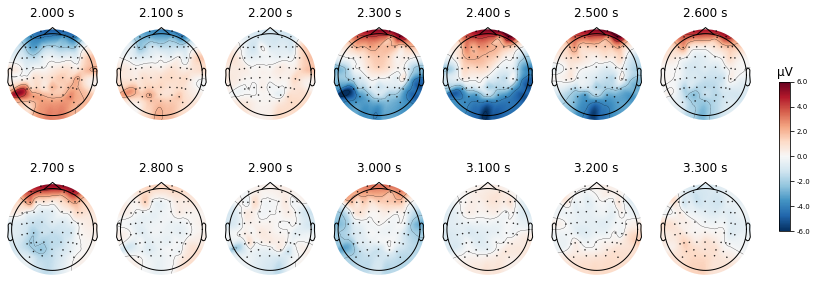

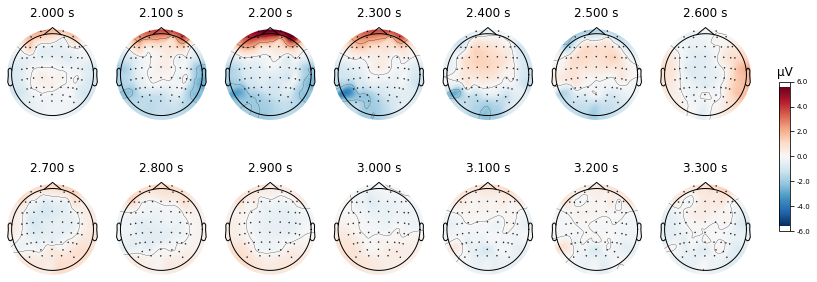

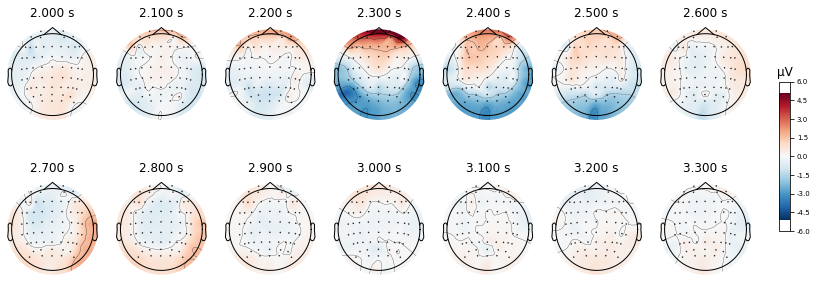

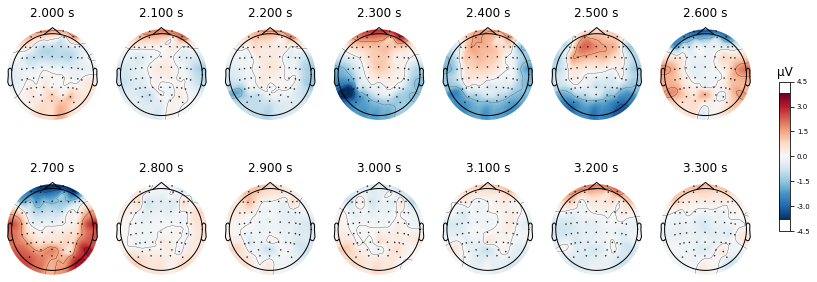

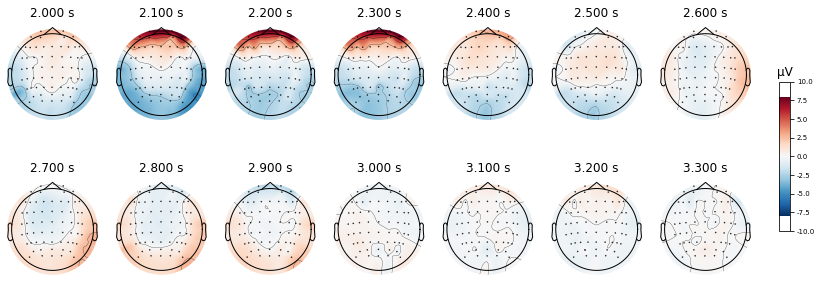

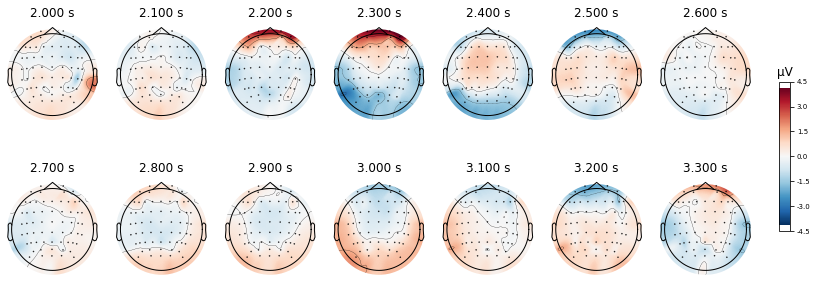

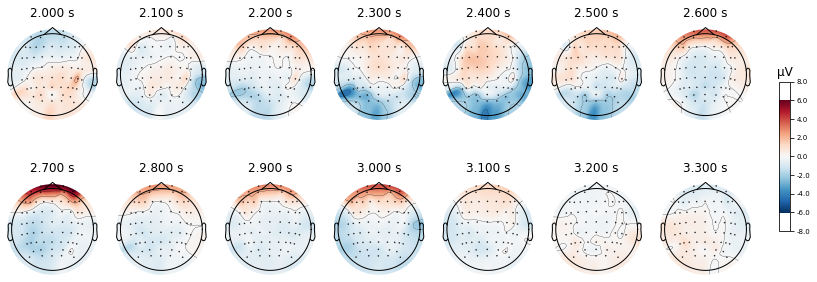

In [114]:
importlib.reload(prep)

# Plot cue-aligned grand average:
src_path, dst_path = fh.gen_paths(pth=data_path, src_fldr='2023_03_22_epoched_cue_aligned_not_resampled', dst_fldr='2023_03_22_results_epoched_cue_aligned_figs_eyesub')

# Based on coefficient testing topoplot at 3.1s
times_of_interest = list(np.arange(2.0,3.4,0.1))

prep.plot_topomaps(src=src_path, dst=dst_path, sbj_list=subjects, paradigm='paradigm', split=[''], times=times_of_interest, ncols=7)

prep.plot_topomaps(src=src_path, dst=dst_path, sbj_list=subjects, paradigm='paradigm', split=['long', 'short'], times=times_of_interest, ncols=7)

prep.plot_topomaps(src=src_path, dst=dst_path, sbj_list=subjects, paradigm='paradigm', split=['up', 'down', 'left', 'right'], times=times_of_interest, ncols=7)

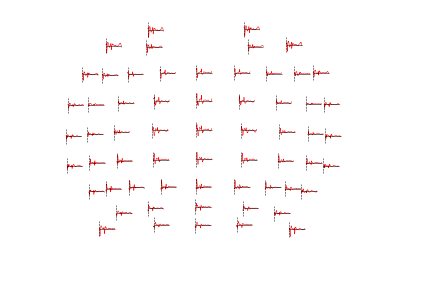

In [123]:
# Keep this line while editing in preprocessing:
importlib.reload(prep)

# Plot cue-aligned grand average:
src_path, dst_path = fh.gen_paths(pth=data_path, src_fldr='2023_03_22_epoched_cue_aligned_not_resampled', dst_fldr='2023_03_22_results_epoched_cue_aligned_figs_eyesub')

# Based on coefficient testing topoplot at 3.1s
times_of_interest = list(np.arange(2.0,3.4,0.1))

prep.plot_grand_average(src=src_path, dst=dst_path, sbj_list=subjects, paradigm='paradigm', split=[''], plot_topo=True)

## 12.1. Movement-aligned

In [124]:
# Get source and destination path + create destintation folder if it does not exist.
src_path, dst_path = fh.gen_paths(pth=data_path, src_fldr='2023_03_22_lowpass_filtered', dst_fldr='2023_03_22_epoched_movement_aligned_not_resampled')

# Iterate over each subject and extract the streams
start = time.time()
for i, subject in enumerate(subjects):
    print(f'Epoching movement-aligned for subject {subject}')

    # Epoch all raw files for the paradigm:
    prep.epoch_and_resample(src=src_path, dst=dst_path, sbj=subject, paradigm='paradigm', cue_aligned=False, resample=False)

print(f'Finished epoching, took me {round(time.time() - start)} seconds...')

Epoching movement-aligned for subject A01
Opening raw data file D:/Diplomarbeit_data/eeg/2023_03_22_lowpass_filtered/A01_paradigm_lowpass_filtered_raw.fif...
    Range : 1131211 ... 1928726 =   5656.055 ...  9643.630 secs
Ready.
Reading 0 ... 797515  =      0.000 ...  3987.575 secs...
Used Annotations descriptions: ['BTT-l', 'BTT-l_ct0', 'BTT-l_ct1', 'BTT-l_ib0', 'BTT-l_ib1', 'BTT-s', 'BTT-s_cc0', 'BTT-s_cc1', 'BTT-s_ib0', 'BTT-s_ib1', 'Break', 'Cue', 'LTR-l', 'LTR-l_cr0', 'LTR-l_cr1', 'LTR-l_il0', 'LTR-l_il1', 'LTR-s', 'LTR-s_cc0', 'LTR-s_cc1', 'LTR-s_il0', 'LTR-s_il1', 'RTL-l', 'RTL-l_cl0', 'RTL-l_cl1', 'RTL-l_ir0', 'RTL-l_ir1', 'RTL-s', 'RTL-s_cc0', 'RTL-s_cc1', 'RTL-s_ir0', 'RTL-s_ir1', 'Start', 'TTB-l', 'TTB-l_cb0', 'TTB-l_cb1', 'TTB-l_it0', 'TTB-l_it1', 'TTB-s', 'TTB-s_cc0', 'TTB-s_cc1', 'TTB-s_it0', 'TTB-s_it1', 'c c 0', 'c c 1', 'c l 0', 'c l 1', 'c r 0', 'c r 1', 'c t 0', 'c t 1']
Not setting metadata
352 matching events found
No baseline correction applied
0 projection items 

In [125]:
# Plot movement-aligned grand average:
# Keep this line while editing in preprocessing:
importlib.reload(prep)

# Plot cue-aligned grand average:
src_path, dst_path = fh.gen_paths(pth=data_path, src_fldr='2023_03_22_epoched_movement_aligned_not_resampled', dst_fldr='2023_03_22_results_epoched_movement_aligned_figs_eyesub')

epochs = prep.plot_grand_average(src=src_path, dst=dst_path, sbj_list=subjects, paradigm='paradigm', split=[''])

prep.plot_grand_average(src=src_path, dst=dst_path, sbj_list=subjects, paradigm='paradigm', split=['long', 'short'])

prep.plot_grand_average(src=src_path, dst=dst_path, sbj_list=subjects, paradigm='paradigm', split=['up', 'down', 'left', 'right'])

times_of_interest = [-0.1, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
times_of_interest = list(np.arange(-0.4,1.0,0.1))

# prep.plot_topomaps(src=src_path, dst=dst_path, sbj_list=subjects, paradigm='paradigm', split=[''], times=times_of_interest)

# prep.plot_topomaps(src=src_path, dst=dst_path, sbj_list=subjects, paradigm='paradigm', split=['long', 'short'], times=times_of_interest)

# prep.plot_topomaps(src=src_path, dst=dst_path, sbj_list=subjects, paradigm='paradigm', split=['up', 'down', 'left', 'right'], times=times_of_interest)

C:\Users\peter\Documents\Code\master-thesis\03_analysis\custom_modules\preprocessing_ptu.py:983: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  ncols=ncols, nrows='auto',
C:\Users\peter\Documents\Code\master-thesis\03_analysis\custom_modules\preprocessing_ptu.py:983: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  ncols=ncols, nrows='auto',
C:\Users\peter\Documents\Code\master-thesis\03_analysis\custom_modules\preprocessing_ptu.py:983: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  ncols=ncols, nrows='auto',
C:\Users\peter\Documents\Code\master-thesis\03_analysis\custom_modules\preprocessing_ptu.py:983: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  ncols=ncols, nrows='auto',
C:\Users\peter\Documents\Code\master-the

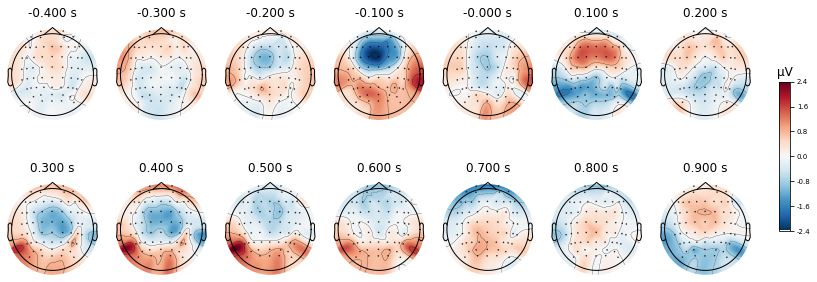

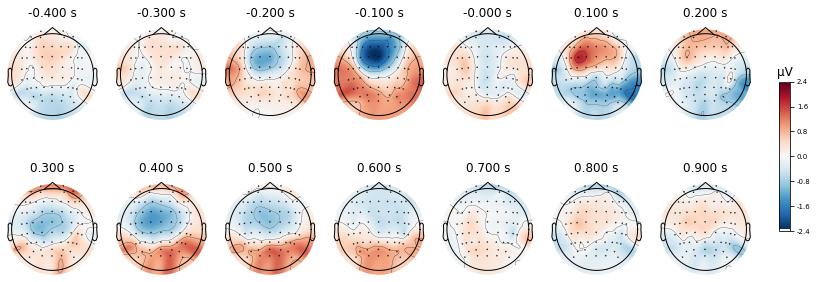

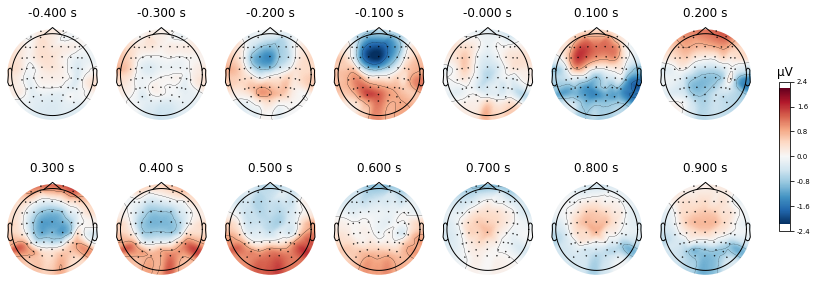

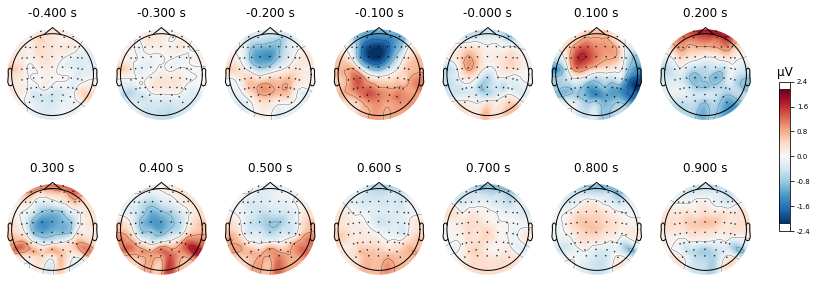

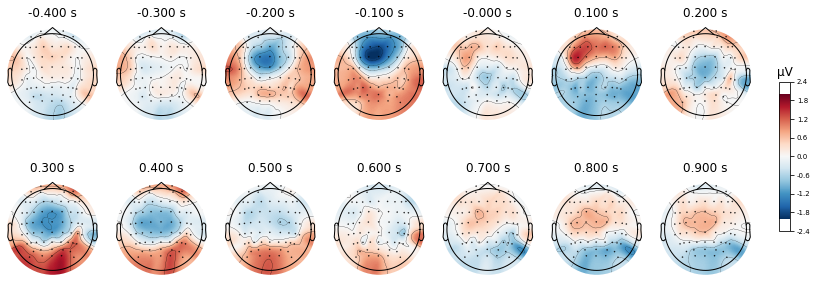

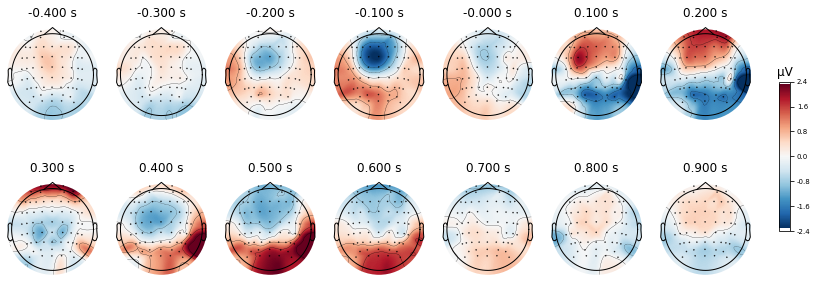

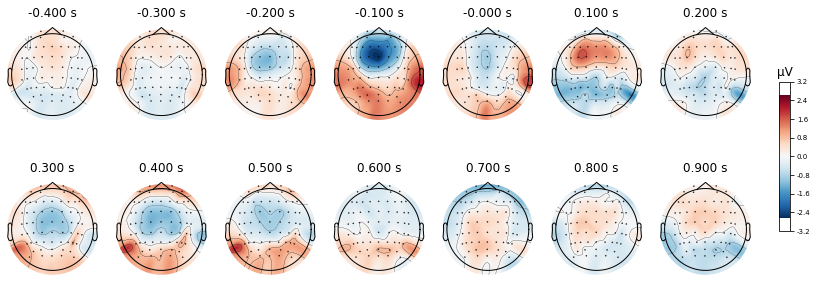

In [126]:
# Keep this line while editing in preprocessing:
importlib.reload(prep)

# Plot cue-aligned grand average:
src_path, dst_path = fh.gen_paths(pth=data_path, src_fldr='2023_03_22_epoched_movement_aligned_not_resampled', dst_fldr='2023_03_22_results_epoched_movement_aligned_figs_eyesub')

# Based on coefficient testing topoplot at 3.1s
times_of_interest = [0.0, 1.3]
times_of_interest = list(np.arange(-0.4,1.0,0.1))

prep.plot_topomaps(src=src_path, dst=dst_path, sbj_list=subjects, paradigm='paradigm', split=[''], times=times_of_interest, ncols=7)

prep.plot_topomaps(src=src_path, dst=dst_path, sbj_list=subjects, paradigm='paradigm', split=['long', 'short'], times=times_of_interest, ncols=7)

prep.plot_topomaps(src=src_path, dst=dst_path, sbj_list=subjects, paradigm='paradigm', split=['up', 'down', 'left', 'right'], times=times_of_interest, ncols=7)

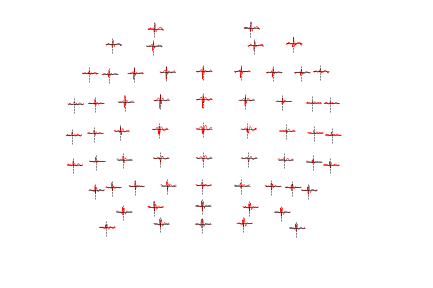

In [127]:
# Plot movement-aligned grand average:
# Keep this line while editing in preprocessing:
importlib.reload(prep)

# Plot cue-aligned grand average:
src_path, dst_path = fh.gen_paths(pth=data_path, src_fldr='2023_03_22_epoched_movement_aligned_not_resampled', dst_fldr='2023_03_22_results_epoched_movement_aligned_figs_eyesub')

epochs = prep.plot_grand_average(src=src_path, dst=dst_path, sbj_list=subjects, paradigm='paradigm', split=[''], plot_topo=True)


In [ ]:
# Get difference between cue onset and movement onset (*i*1):
trial_type_markers = ['LTR-s', 'LTR-l', 'RTL-s', 'RTL-l', 'TTB-s', 'TTB-l', 'BTT-s', 'BTT-l']
cue_times = []
release_times = []
touch_times = []
for i, entry in enumerate(epochs.annotations.description):
    if entry in trial_type_markers:
        if 'bad' in epochs.annotations.description[i+1]:
            continue
        else:
            # Get delay between cue which is 'Cue' at i+3 and ix1 at i+4 and cx0 at i+5
            cue_times.append(epochs.annotations.onset[i+3])
            release_times.append(epochs.annotations.onset[i+4])
            touch_times.append(epochs.annotations.onset[i+5])


In [ ]:
import numpy as np
diff_cue_release = np.array(release_times) - np.array(cue_times)
diff_release_touch = np.array(touch_times) - np.array(release_times)

In [ ]:
bins=np.arange(epochs.tmin, epochs.tmax, 1/epochs.info['sfreq'])
hist = np.histogram(diff_cue_release, bins=bins, range=None)

In [ ]:
kernel = gauss(n=55, b=0.04*epochs.info['sfreq'])

smoothed = np.convolve(hist[0], kernel, 'same')
x = np.arange(epochs.tmin, epochs.tmax+1/epochs.info['sfreq'], 1/epochs.info['sfreq'])
plt.plot(smoothed)
plt.show()

In [ ]:
def gauss(n=11,b=0.04):
    r = range(-int(n/2),int(n/2)+1)
    return [np.exp(-float(x)**2/(2*b**2)) for x in r]

In [ ]:
import matplotlib.pyplot as plt

plt.plot(smoothed)
plt.show()

In [ ]:
epochs.tmax

In [ ]:
trial_type_markers = ['LTR-s', 'LTR-l', 'RTL-s', 'RTL-l', 'TTB-s', 'TTB-l', 'BTT-s', 'BTT-l']
for i, entry in enumerate(descriptions):
    if entry in trial_type_markers:
        if 'bad' in descriptions[i+1]:
            continue
        else:
            trial_type = entry
            period = 'i'  # indication
            position = descriptions[i+2][2]
            state = descriptions[i+2][4]

            descriptions[i+2] = trial_type + '_' + period + position + state

            trial_type = entry
            period = 'i'  # indication
            position = descriptions[i+4][2]
            state = descriptions[i+4][4]

            descriptions[i+4] = trial_type + '_' + period + position + state

            trial_type = entry
            period = 'c'  # cue
            position = descriptions[i+5][2]
            state = descriptions[i+5][4]

            descriptions[i+5] = trial_type + '_' + period + position + state

            trial_type = entry
            period = 'c'  # cue
            position = descriptions[i+7][2]
            state = descriptions[i+7][4]

            descriptions[i+7] = trial_type + '_' + period + position + state

return descriptions